<a href="https://colab.research.google.com/github/chawdharishoaib/Data-Science-and-Analytics-Projects/blob/main/ScottishPower_Customer_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer loss prediction

### **Problem Statement:**
Present an analysis why customers have left ScottishPower?

# Introduction:

What is Customer Churn?

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the energy industry can choose from a variety of service providers and switch from one to the next. The energy business has an annual churn rate of 11% percent in this highly competitive market.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers. To reduce customer churn, companies need to predict which customers are at high risk of churn. As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive.

Objectives:

I will explore the data and try to answer some questions like:
* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the tenure?
* Is there any patterns/preference in Churn Customers based on the type of payments method?
* Many more questions that will arise during the analysis

## 1. Importing Liabraries

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

## 2. Loading data from drive

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read files from drive or database
df = pd.read_csv('/content/drive/My Drive/database/SP_Loss_Data.csv')

In [ ]:
# view all the columns in the dataset
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,LossDate,Loss,AccountStartdate,AccountDeterminationGroup,InstallmentPlan,OffsetValue,DebtPlanGroup,PaymentFrequency,ComplaintType,StatusGrouping,CustomerCategory,CustomerType,PreferredContactMethod,OfgemCodeRisk,MosaicGroup,MosaicType,MosaicTypeDesc,MosaicDigitalGroup,MosaicDigitalGroupDesc,MosaicFSSGroup,MosaicFSSType,MosaicHouseholdIncValue,MosaicResidenceType,MosaicNoAdultsHousehold
0,08/05/2024,1,20/02/2014,Domestic,No,488.17,Cash,Monthly,NaN,NaN,Person,Unknown,Post (letter),PSR_High_Risk,Vintage Value,Pocket Pensions,Penny-wise elderly singles renting in developm...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1
1,15/05/2024,1,19/11/2022,Domestic,No,27.88,Cash,Monthly,NaN,NaN,Person,Type not available,Post (letter),PSR_No_SNEED_Flags,Aspiring Homemakers,Contemporary Starts,Young families and singles setting up home in ...,First-Gen Parents,Members of the first digital generation who ar...,Deal Seekers,Cost Optimisers,25973,Semi-Detached,2
2,29/05/2024,1,31/05/2023,Domestic,No,66.87,Cash,Monthly,NaN,NaN,Person,Unknown,E-Mail,PSR_No_SNEED_Flags,Rental Hubs,Central Pulse,City-loving youngsters renting central flats i...,Digital Frontier,Young adults with sophisticated online behavio...,Money Makers,City Buzz,54227,Flat,2
3,06/05/2024,1,24/09/2013,Domestic,No,46.65,Cash,Quarterly,NaN,NaN,Person,Unknown,Post (letter),PSR_No_SNEED_Flags,Municipal Tenants,Mature Workers,Older social renters settled in low value home...,Online Escapists,Singles and families with squeezed finances us...,Cash Economy,Workaday Families,22953,Terraced,2
4,16/05/2024,1,06/04/2019,Domestic,No,1145.62,Cash,Monthly,NaN,NaN,Person,Type not available,Post (letter),PSR_No_SNEED_Flags,Vintage Value,Pocket Pensions,Penny-wise elderly singles renting in developm...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1


In [ ]:
df_copy = df.copy()

### Understanding the data

Each row represents a customer, each column contains customer’s attributes.

The dataset has a variety of features related to customer demographics, financial status, and behavioral patterns. Here's an overview of some key columns:

* **LossDate:** The date when the customer left ScottishPower or 31/12/9999 for those still with the company.
* **Loss:** A binary indicator where 1 means the customer has left and 0 means they are still with the company.
* **Account Start Date:** The date the customer started their contract.
* **Account Determination Group:** Whether the customer is a residential (Domestic) or small business (SME).
* **Installment Plan:** Whether the customer is on an installment plan (Yes/No).
* **Offset Value:** The amount of money the customer owes.
* **Debt Plan Group:** Payment method (e.g., Prepayment Meter, Cash, Direct Debit).
* **Complaint Type:** If the customer has had a previous complaint.
* **Mosaic Group and Mosaic Type:** These fields contain third-party marketing information about the customer’s postal area.
* **Mosaic Household Income Value:** The household income based on the Mosaic group.

The target variable that we will be using to guide the exploration is **Loss**.

In [ ]:
df.shape

(5000, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LossDate                   5000 non-null   object 
 1   Loss                       5000 non-null   int64  
 2   AccountStartdate           5000 non-null   object 
 3   AccountDeterminationGroup  5000 non-null   object 
 4   InstallmentPlan            4946 non-null   object 
 5   OffsetValue                5000 non-null   float64
 6   DebtPlanGroup              5000 non-null   object 
 7   PaymentFrequency           5000 non-null   object 
 8   ComplaintType              979 non-null    object 
 9   StatusGrouping             979 non-null    object 
 10  CustomerCategory           5000 non-null   object 
 11  CustomerType               5000 non-null   object 
 12  PreferredContactMethod     5000 non-null   object 
 13  OfgemCodeRisk              5000 non-null   objec

<Axes: >

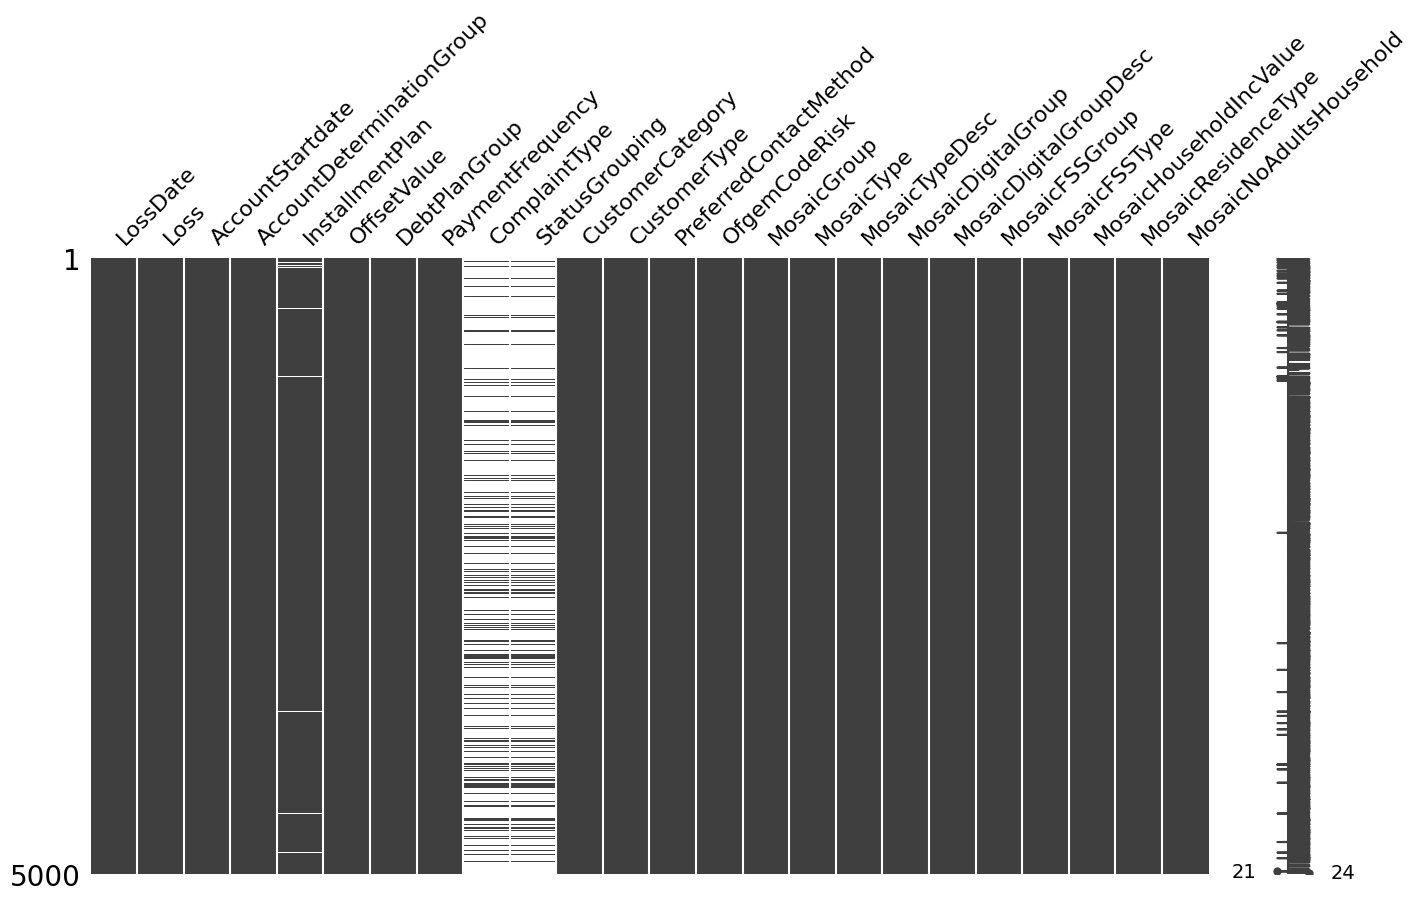

In [ ]:
# visualise the missing values
msno.matrix(df, figsize=(16, 8))

Using this matrix we can quickly find the pattern of missing data in the dataset.

From the above visualisation we can observe that columns **InstallmentPlan**, **ComplaintType**, and **StatusGrouping** has missing values

In [ ]:
#let's find out exact number of null values
df.isnull().sum()

,0
LossDate,0
Loss,0
AccountStartdate,0
AccountDeterminationGroup,0
InstallmentPlan,54
OffsetValue,0
DebtPlanGroup,0
PaymentFrequency,0
ComplaintType,4021
StatusGrouping,4021


# 3. Data Cleaning

### 1. Handling the missing values:

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values>0]

,0
InstallmentPlan,54
ComplaintType,4021
StatusGrouping,4021


1.1. The column Installment plan is a binary feature which indicates that whether a customer is on an installment plan. Since it only has 54 missing values, let's use the mode (most frequent value) to fill these missing values.

In [ ]:
# filling missing values for 'Installment Plan'
df['InstallmentPlan'].fillna(df['InstallmentPlan'].mode()[0], inplace=True)

1.2. The column **ComplaintType** and **StatusGrouping** has a significant number of missing values, more likely because most of the customers haven't made complaints.
* Hence, filling the missing values with "No Complaints" and "No Status" respectively to indicate that the customer didn’t register a complaint.

In [ ]:
# filling missing values with "No Complaints"
df['ComplaintType'].fillna('No Complaint', inplace = True)

In [ ]:
# filling missing values with "No Status"
df['StatusGrouping'].fillna('No Status', inplace = True)

In [ ]:
df.isnull().sum()

,0
LossDate,0
Loss,0
AccountStartdate,0
AccountDeterminationGroup,0
InstallmentPlan,0
OffsetValue,0
DebtPlanGroup,0
PaymentFrequency,0
ComplaintType,0
StatusGrouping,0


In [ ]:
df.groupby('ComplaintType').size()

,0
ComplaintType,
Complaint,962
No Complaint,4021
Ombudsman,17


In [ ]:
df.groupby('InstallmentPlan').size()

,0
InstallmentPlan,
No,4490
Yes,510


There is no missing values in the dataset and the changes made are reflecting properly.

### 2. Convert Date Columns:

2.1 Converting the **LossDate** and **Account Start Date** to proper date formats.

In [ ]:
df[['LossDate', 'AccountStartdate']].dtypes

,0
LossDate,object
AccountStartdate,object


In [ ]:
# Converting 'LossDate' and 'Account Start Date' to proper format
df['LossDate'] = pd.to_datetime(df['LossDate'], errors='coerce', format='%d/%m/%Y')
df['AccountStartdate'] = pd.to_datetime(df['AccountStartdate'], errors='coerce', format='%d/%m/%Y')

In [ ]:
# data types after converting into proper date format
df[['LossDate', 'AccountStartdate']].dtypes

,0
LossDate,datetime64[ns]
AccountStartdate,datetime64[ns]


In [ ]:
df[['LossDate', 'AccountStartdate']].head()

,LossDate,AccountStartdate
0,2024-05-08,2014-02-20
1,2024-05-15,2022-11-19
2,2024-05-29,2023-05-31
3,2024-05-06,2013-09-24
4,2024-05-16,2019-04-06


2.2 Handling "31/12/9999" for customers who haven't left yet, because it's out of bounds for the standard date range. To handle this, let's treat this specific date as a flag for customers who are still with ScottishPower, but instead of converting it to a date, I'll handle it separately as a categorical variable.

In [ ]:
# creating a new column
df['Still_with_ScottishPower'] = df['LossDate'].isna()

In [ ]:
df.groupby('Still_with_ScottishPower').size()

,0
Still_with_ScottishPower,
False,1000
True,4000


In [ ]:
# converting 'Installment Plan' to binary (Yes -1 and No 0)
df['InstallmentPlan'] = df['InstallmentPlan'].map({'Yes': 1, 'No': 0})

In [ ]:
# converting 'Still_with_ScottishPower' to binary (true - 1 and false - 0)
df['Still_with_ScottishPower'] = df['Still_with_ScottishPower'].map({True: 1, False: 0})

In [ ]:
df['Still_with_ScottishPower'].dtypes

dtype('int64')

In [ ]:
# cleaned data
df.head()

,LossDate,Loss,AccountStartdate,AccountDeterminationGroup,InstallmentPlan,OffsetValue,DebtPlanGroup,PaymentFrequency,ComplaintType,StatusGrouping,CustomerCategory,CustomerType,PreferredContactMethod,OfgemCodeRisk,MosaicGroup,MosaicType,MosaicTypeDesc,MosaicDigitalGroup,MosaicDigitalGroupDesc,MosaicFSSGroup,MosaicFSSType,MosaicHouseholdIncValue,MosaicResidenceType,MosaicNoAdultsHousehold,Still_with_ScottishPower
0,2024-05-08,1,2014-02-20,Domestic,0,488.17,Cash,Monthly,No Complaint,No Status,Person,Unknown,Post (letter),PSR_High_Risk,Vintage Value,Pocket Pensions,Penny-wise elderly singles renting in developm...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1,0
1,2024-05-15,1,2022-11-19,Domestic,0,27.88,Cash,Monthly,No Complaint,No Status,Person,Type not available,Post (letter),PSR_No_SNEED_Flags,Aspiring Homemakers,Contemporary Starts,Young families and singles setting up home in ...,First-Gen Parents,Members of the first digital generation who ar...,Deal Seekers,Cost Optimisers,25973,Semi-Detached,2,0
2,2024-05-29,1,2023-05-31,Domestic,0,66.87,Cash,Monthly,No Complaint,No Status,Person,Unknown,E-Mail,PSR_No_SNEED_Flags,Rental Hubs,Central Pulse,City-loving youngsters renting central flats i...,Digital Frontier,Young adults with sophisticated online behavio...,Money Makers,City Buzz,54227,Flat,2,0
3,2024-05-06,1,2013-09-24,Domestic,0,46.65,Cash,Quarterly,No Complaint,No Status,Person,Unknown,Post (letter),PSR_No_SNEED_Flags,Municipal Tenants,Mature Workers,Older social renters settled in low value home...,Online Escapists,Singles and families with squeezed finances us...,Cash Economy,Workaday Families,22953,Terraced,2,0
4,2024-05-16,1,2019-04-06,Domestic,0,1145.62,Cash,Monthly,No Complaint,No Status,Person,Type not available,Post (letter),PSR_No_SNEED_Flags,Vintage Value,Pocket Pensions,Penny-wise elderly singles renting in developm...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1,0


### The dataset has been successfully cleaned and prepared for further analysis:

* **LossDate** and **Account Start Date** have been converted to proper date formats.
* The **LossDate** field for customers still with the company (previously 31/12/9999) has been handled by creating a new boolean column, Still_with_ScottishPower. Additionally, the date "31/12/9999" is replaced by NaT or null values to handle theh analysis properly.
* The **Installment Plan** column is replaced to a binary numeric field (1 for Yes, 0 for No).

### 3. Feature Engineering for Tenure:

Creating a new Feature or Column named Customer_Tenure_Days, Months, and Years based on "LossDate" and "Account Start Date" to perform analysis based on number of days customer stayed with the company.


In [ ]:
# calculating customer tenure as the difference between LossDate and AccountStartdate (in days)
df['Customer_Tenure_Days'] = (df['LossDate'] - df['AccountStartdate']).dt.days

# Checking for missing values in tenure, which will occur if the customer hasn't left (LossDate is NaT)
df['Customer_Tenure_Days'].fillna((pd.Timestamp('2024-09-01') - df['AccountStartdate']).dt.days, inplace=True)

In [ ]:
df.head()

,LossDate,Loss,AccountStartdate,AccountDeterminationGroup,InstallmentPlan,OffsetValue,DebtPlanGroup,PaymentFrequency,ComplaintType,StatusGrouping,CustomerCategory,CustomerType,PreferredContactMethod,OfgemCodeRisk,MosaicGroup,MosaicType,MosaicTypeDesc,MosaicDigitalGroup,MosaicDigitalGroupDesc,MosaicFSSGroup,MosaicFSSType,MosaicHouseholdIncValue,MosaicResidenceType,MosaicNoAdultsHousehold,Still_with_ScottishPower,Customer_Tenure_Days
0,2024-05-08,1,2014-02-20,Domestic,0,488.17,Cash,Monthly,No Complaint,No Status,Person,Unknown,Post (letter),PSR_High_Risk,Vintage Value,Pocket Pensions,Penny-wise elderly singles renting in developm...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1,0,3730.0
1,2024-05-15,1,2022-11-19,Domestic,0,27.88,Cash,Monthly,No Complaint,No Status,Person,Type not available,Post (letter),PSR_No_SNEED_Flags,Aspiring Homemakers,Contemporary Starts,Young families and singles setting up home in ...,First-Gen Parents,Members of the first digital generation who ar...,Deal Seekers,Cost Optimisers,25973,Semi-Detached,2,0,543.0
2,2024-05-29,1,2023-05-31,Domestic,0,66.87,Cash,Monthly,No Complaint,No Status,Person,Unknown,E-Mail,PSR_No_SNEED_Flags,Rental Hubs,Central Pulse,City-loving youngsters renting central flats i...,Digital Frontier,Young adults with sophisticated online behavio...,Money Makers,City Buzz,54227,Flat,2,0,364.0
3,2024-05-06,1,2013-09-24,Domestic,0,46.65,Cash,Quarterly,No Complaint,No Status,Person,Unknown,Post (letter),PSR_No_SNEED_Flags,Municipal Tenants,Mature Workers,Older social renters settled in low value home...,Online Escapists,Singles and families with squeezed finances us...,Cash Economy,Workaday Families,22953,Terraced,2,0,3877.0
4,2024-05-16,1,2019-04-06,Domestic,0,1145.62,Cash,Monthly,No Complaint,No Status,Person,Type not available,Post (letter),PSR_No_SNEED_Flags,Vintage Value,Pocket Pensions,Penny-wise elderly singles renting in developm...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1,0,1867.0


#4. Exploratory Data Analysis (EDA):

### 4.1 Let's dive deep into dataset to investigate the key factors driving customer churn (Churn - customer leaving the Scottish Power).
* Analyzing customer tenure, offset values, and demographics to identify any trends and patterns.

In [ ]:
# Visualize churn distribution
churn_distribution = df['Loss'].value_counts(normalize=True) * 100
churn_distribution

,proportion
Loss,
0,80.0
1,20.0


In [ ]:
c_labels = ['No', 'Yes']

# Create subplots: use 'domain' type for Pie subplot
fig =go.Figure(go.Pie(labels=c_labels, values=df['Loss'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    annotations=[dict(text='Churn', x=0.50, y=0.5, font_size=15, showarrow=False)],
    width=600, height=400)
fig.show()

In [ ]:
# analyzing relationship between 'Offset Value' and churn ('Loss')
churn_vs_offset = df.groupby('Loss')['OffsetValue'].mean()
churn_vs_offset

,OffsetValue
Loss,
0,397.347365
1,197.746810


In [ ]:
import plotly.express as px
c_labels = ['No', 'Yes']
plt.figure(figsize = (6,5))
# Calculate the mean OffsetValue grouped by 'Loss'
df_grouped = df.groupby(['Loss'])['OffsetValue'].mean().reset_index()

# Create an interactive bar chart using Plotly
fig = px.bar(df_grouped, x='Loss', y='OffsetValue',
             labels={'Loss': 'Churn', 'OffsetValue': 'Value (GBP)'},
             title='Offset Value and Churn')

# Customize layout for better presentation
fig.update_layout( yaxis_title="Value (GBP)", xaxis_title="Churn",
    title_x=0.5, width=600, height=400
)

fig.show()


<Figure size 600x500 with 0 Axes>

In [ ]:
# analyzing relationship between 'Installment Plan' and 'Loss'
churn_vs_installment_plan = df.groupby('Loss')['InstallmentPlan'].mean()
churn_vs_installment_plan

,InstallmentPlan
Loss,
0,0.12475
1,0.01100


In [ ]:
fig = px.histogram(df, x="Loss", color="InstallmentPlan", barmode="group", title="<b>Installment Plan distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Insights.**

1. Churn Distribution:

  * 80% of the customers in the dataset are still with ScottishPower, while 20% of customers have left.
2. Offset Value and Churn:
  * Customers who stay with ScottishPower have a higher average "Offset Value" (approximately £397) compared to those who have left (approximately £198). This could suggest that customers who owe more tend to stay with the company, possibly due to unresolved payments.
3. Installment Plan and Churn:
  * The percentage of customers on an installment plan is higher for those who stay (12.5%) compared to those who leave (1.1%). This suggests that being on an installment plan may help in customer retention.

### 4.2  Let's dive deep to explore other factors such as the impact of **Debt Plan Group, Tenure, Complaint Type and demographics.**

In [ ]:
df[df['Loss'] == 0].groupby('DebtPlanGroup')['Loss'].count()

,Loss
DebtPlanGroup,
Cash,2433
DD,1291
PP,276


In [ ]:
df[df['Loss'] == 1].groupby('DebtPlanGroup')['Loss'].count()

,Loss
DebtPlanGroup,
Cash,300
DD,514
PP,186


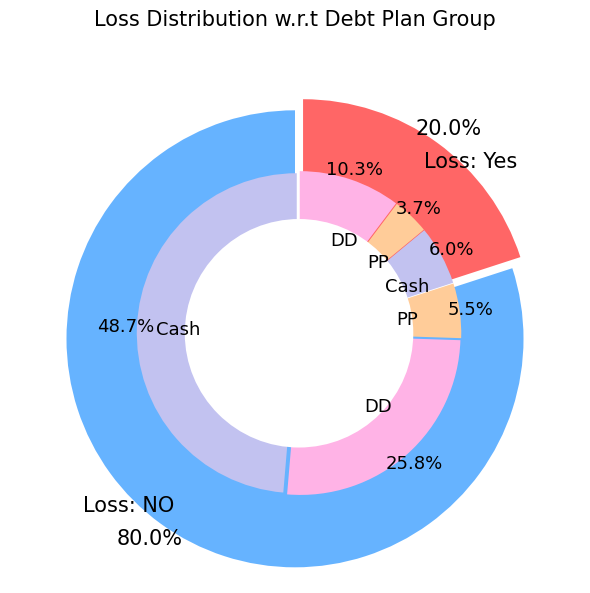

In [ ]:
plt.figure(figsize=(6, 6))

labels_loss = ["Loss: NO", "Loss: Yes"]
values_loss = [4000,1000]
colors_loss = ['#66b3ff', '#ff6666']
explode_loss = (0.3, 0.3)

labels_debt = ["Cash", "DD", "PP", "Cash", "PP", "DD"]
sizes_debt = [2433, 1291, 276, 300, 186, 514]
colors_debt = ['#c2c2f0', '#ffb3e6', '#ffcc99', '#c2c2f0', '#ffcc99', '#ffb3e6']
explode_debt = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

textprops = {"fontsize": 15}
# plot pie chart
plt.pie(values_loss, labels=labels_loss, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.9, colors=colors_loss,
        startangle=90, frame=True, explode=explode_loss, radius=10, textprops=textprops, counterclock=True)

plt.pie(sizes_debt, labels=labels_debt, autopct='%1.1f%%', pctdistance=1.07, labeldistance=0.6, colors=colors_debt,
        startangle=90, explode=explode_debt, radius=7, textprops={"fontsize": 13}, counterclock=True)

# draw center circle
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Show plot
plt.title('Loss Distribution w.r.t Debt Plan Group', fontsize=15, y=1.1)
plt.axis('equal')
plt.tight_layout()
plt.show()


Customers with the DD debt plan have highest churn rate which is approximately 50% of total customers who left.

In [ ]:
# churn rate by 'Debt Plan Group'
churn_vs_debt_plan = df.groupby('DebtPlanGroup')['Loss'].mean()
print(churn_vs_debt_plan*100)

DebtPlanGroup
Cash    10.976948
DD      28.476454
PP      40.259740
Name: Loss, dtype: float64


Churn by Debt Plan Group:
  * Cash customers have the lowest churn rate (approximately 10.9%).
  * Direct Debit (DD) customers have a higher churn rate (28.5%).
  * Prepayment Meter (PP) customers have the highest churn rate (40.3%).

In [ ]:
# churn rate by 'Complaint Type'
churn_vs_complaint = df.groupby('ComplaintType')['Loss'].mean()
print(churn_vs_complaint*100)

ComplaintType
Complaint       12.474012
No Complaint    21.735887
Ombudsman       35.294118
Name: Loss, dtype: float64


Churn by Complaint Type:
  * Customers with regular complaints have a churn rate of 12.5%, which is slightly higher than the overall churn rate.
  * Customers with complaints escalated to the Ombudsman have a significantly higher churn rate (35.3%).

**Insights:**
* **Prepayment (PP) customers** and those with **Ombudsman complaints** are more likely to leave ScottishPower.
* **Cash payment** appears to correlate with higher retention

### 4.3 Churn Behaviour by Tenure

By examining the length of time customers stay before leaving, we can identify patterns related to churn, such as:

* Customers who are likely to leave within the first few months.
* Differences in churn behavior based on tenure, e.g., short-term vs long-term customers.

In [ ]:
# tenure in months and years
df['Customer_Tenure_Months'] = df['Customer_Tenure_Days'] / 30.44
df['Customer_Tenure_Years'] = df['Customer_Tenure_Days'] / 365.25

# customer group
bins = [0, 1, 3, 5, df['Customer_Tenure_Years'].max()]
labels = ['< 1 year', '1-3 years', '3-5 years', '> 5 years']
df['Tenure_Group'] = pd.cut(df['Customer_Tenure_Years'], bins=bins, labels=labels, right=False)

In [ ]:
fig = px.box(df, x='Loss', y = 'Customer_Tenure_Months')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

New customers are more likely to churn

In [ ]:
churn_by_tenure = df.groupby('Tenure_Group')['Loss'].mean().reset_index()
#plot
fig = px.bar(churn_by_tenure, x='Tenure_Group', y='Loss', title='<b>Churn Rate by Customer Tenure Group</b>',
             labels={'Loss': 'Churn Rate', 'Tenure_Group': 'Tenure Group (Years)'})
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


* Customers with **less than 1 year of tenure** have a **100%** churn rate. The churn rate for customers with **1-3 years and 3-5 years** of tenure are **25.2% and 18.9%** respectively.
* Customers with **more than 5 years** of tenure have the **lowest churn rate at 11.9%**, which indicates higher retention for long-term customers.

**Key Insights:**
* **Short-term customers (<1 year)** are at the highest risk of churn and may need targeted interventions. This indicate that customers who leave early are a critical group to target for retention efforts.
* Retention seems to improve as customer tenure increases, with long-term customers **(>5 years)** being the most stable.

**Let's dive deep into to explore why the newer (short-term) customers leave earlier and what could be done to improve retention within the first year.**

In [ ]:
# variables for short term and long term customers
short_term_customers = df[df['Tenure_Group'] == '< 1 year']
long_term_customers = df[df['Tenure_Group'] != '< 1 year']

In [ ]:
offset_value_comparison = {
    'Short-Term (Offset)': short_term_customers['OffsetValue'].mean(),
    'Long-Term (Offset)': long_term_customers['OffsetValue'].mean()
}

# convert dictionary into a DataFrame
offset_values = pd.DataFrame(list(offset_value_comparison.items()), columns=['Customer Type', 'Average Offset Value'])

# plot
fig = px.bar(offset_values, x='Customer Type', y='Average Offset Value', title='<b>Average Offset Value: Short-Term vs Long-Term Customers</b>',
             labels={'Average Offset Value': 'Average Offset Value (£)', 'Customer Type': 'Customer Type'},
             color='Customer Type', color_discrete_sequence=['orange', 'blue'])
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* **Short-Term Customers (less than 1 year):** The average offset value is £288.97.
* **Long-Term Customers (more than 1 year):** The average offset value is £359.41.

* This indicates that short-term customers, on average, owe less compared to long-term customers, suggesting that financial obligations may not be the primary reason for early churn.

In [ ]:
installment_plan_comparison = {
    'Short-Term (Installment Plan)': short_term_customers['InstallmentPlan'].mean(),
    'Long-Term (Installment Plan)': long_term_customers['InstallmentPlan'].mean()
}

installment_plans = pd.DataFrame(list(installment_plan_comparison.items()), columns=['Customer Type', 'Percentage on Installment Plans'])

# plot
fig = px.bar(installment_plans, x='Customer Type', y='Percentage on Installment Plans', title='<b>Installment Plan Usage: Short-Term vs Long-Term Customers</b>',
             labels={'Percentage on Installment Plans': 'Percentage on Installment Plans', 'Customer Type': 'Customer Type'},
             color='Customer Type', color_discrete_sequence=['#00CC96', '#B6E880'])
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


* Only **2.12% Short-Term Customers** are on an installment plan, while **10.5% Long-Term Customers** are on an installment plan.
* The low percentage of short-term customers on installment plans suggests that installment plans seems to help with retention, as more long-term customers tend to be on such plans.

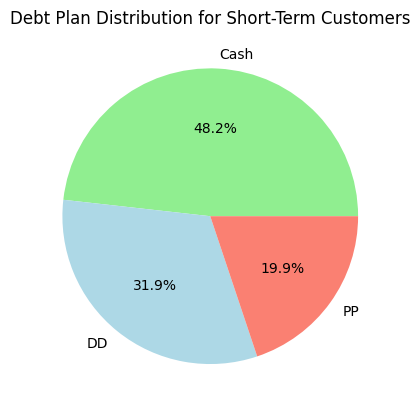

In [ ]:
debt_plan_comparison = short_term_customers['DebtPlanGroup'].value_counts(normalize=True).to_dict()
#plot
debt_plan_series = pd.Series(debt_plan_comparison)
debt_plan_series.plot(kind='pie', autopct='%1.1f%%', title='Debt Plan Distribution for Short-Term Customers', colors=['lightgreen', 'lightblue', 'salmon'])
plt.ylabel('')
plt.show()

* The **48.2%** of short-term customers use **Cash payments** which is significantly high.
* Short-term customers are more likely to pay using cash, which might suggest a lack of engagement or loyalty and correlate with higher churn risk.

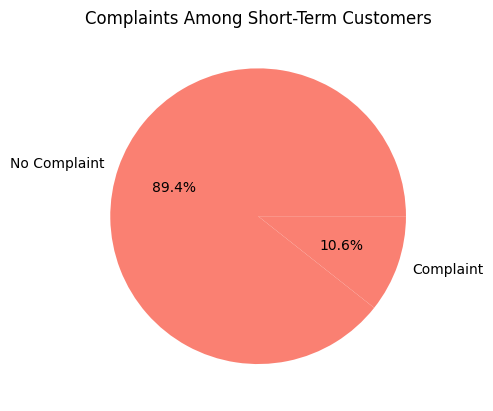

In [ ]:
complaint_comparison = short_term_customers['ComplaintType'].value_counts(normalize=True).to_dict()
#plot
complaints_series = pd.Series(complaint_comparison)
complaints_series.plot(kind='pie', autopct='%1.1f%%', title='Complaints Among Short-Term Customers', colors=['salmon'])
plt.ylabel('')
plt.show()


* 10.6% of short-term customers who left had a complaint registered. This suggests that complaints are a factor contributing to early churn.
* Complaints appear to be a key driver of early churn, as all short-term customers who left had registered a complaint.



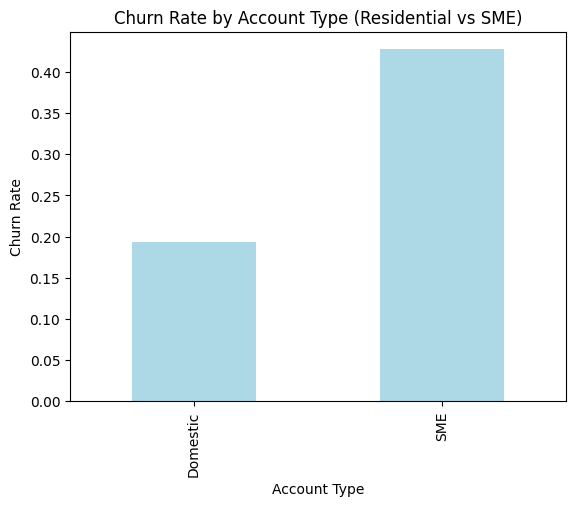

In [ ]:
churn_by_account_type = df.groupby('AccountDeterminationGroup')['Loss'].mean()

# plot
churn_by_account_type.plot(kind='bar', color='lightblue', title='Churn Rate by Account Type (Residential vs SME)')
plt.ylabel('Churn Rate')
plt.xlabel('Account Type')
plt.show()

* This indicates that SME customers have a much higher churn rate of 42.7% which means they're significantly  more likely to leave compared to domestic customers.

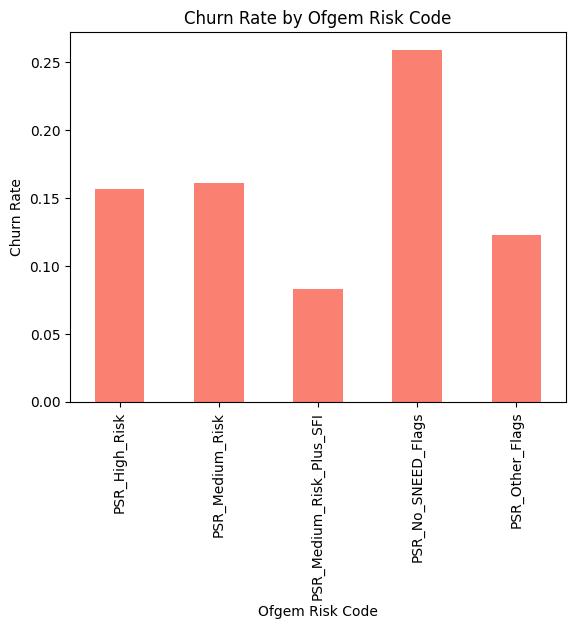

In [ ]:
churn_by_risk_code = df.groupby('OfgemCodeRisk')['Loss'].mean()

#plot
churn_by_risk_code.plot(kind='bar', color='salmon', title='Churn Rate by Ofgem Risk Code')
plt.ylabel('Churn Rate')
plt.xlabel('Ofgem Risk Code')
plt.show()

* This indicates that customers without registered vulnerabilities (PSR No SNEED Flags) have the highest churn rate followed by customer registered with high risk and medium risk, while those with medium-risk and financial vulnerability (PSR Medium Risk Plus SFI) have the lowest churn rate.

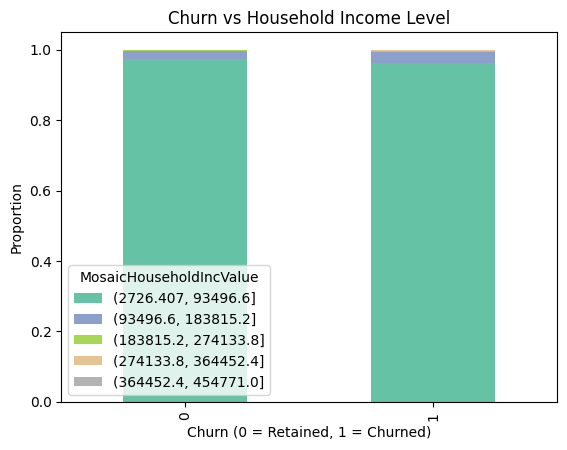

In [ ]:
churn_vs_income_level = pd.crosstab(df['Loss'], pd.cut(df['MosaicHouseholdIncValue'], bins=5), normalize='index')

# plot
churn_vs_income_level.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Churn vs Household Income Level')
plt.xlabel('Churn (0 = Retained, 1 = Churned)')
plt.ylabel('Proportion')
plt.show()

* The lower income brackets have a higher churn rate. This implies that customers facing financial constraints are more likely to leave, possibly due to affordability issues.

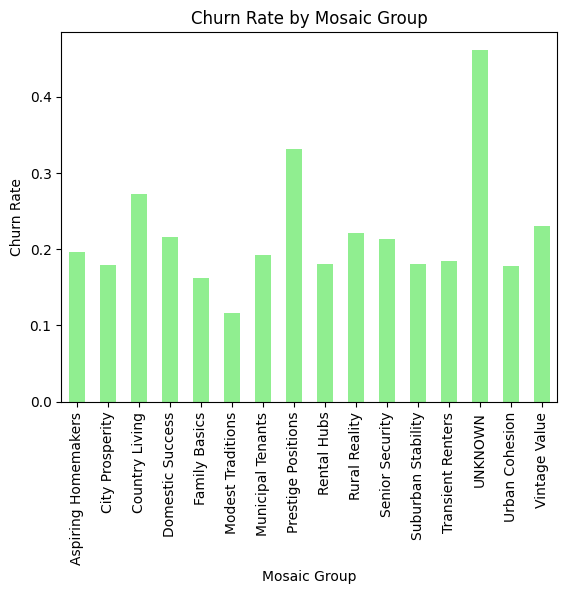

In [ ]:
churn_by_mosaic_group = df.groupby('MosaicGroup')['Loss'].mean()

#plot
churn_by_mosaic_group.plot(kind='bar', color='lightgreen', title='Churn Rate by Mosaic Group')
plt.ylabel('Churn Rate')
plt.xlabel('Mosaic Group')
plt.show()

The geographical segmentation shows that certain groups like Prestige Positions and Country Living tend to have higher churn, while groups like Modest Traditions and Family Basics are more stable.

# 5. Feature Engineering

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,LossDate,Loss,AccountStartdate,AccountDeterminationGroup,InstallmentPlan,OffsetValue,DebtPlanGroup,PaymentFrequency,ComplaintType,StatusGrouping,CustomerCategory,CustomerType,PreferredContactMethod,OfgemCodeRisk,MosaicGroup,MosaicType,MosaicTypeDesc,MosaicDigitalGroup,MosaicDigitalGroupDesc,MosaicFSSGroup,MosaicFSSType,MosaicHouseholdIncValue,MosaicResidenceType,MosaicNoAdultsHousehold,Still_with_ScottishPower,Customer_Tenure_Days,Customer_Tenure_Months,Customer_Tenure_Years,Tenure_Group
0,2024-05-08,1,2014-02-20,Domestic,0,488.17,Cash,Monthly,No Complaint,No Status,Person,Unknown,Post (letter),PSR_High_Risk,Vintage Value,Pocket Pensions,Penny-wise elderly singles renting in developm...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1,0,3730.0,122.536137,10.212183,> 5 years
1,2024-05-15,1,2022-11-19,Domestic,0,27.88,Cash,Monthly,No Complaint,No Status,Person,Type not available,Post (letter),PSR_No_SNEED_Flags,Aspiring Homemakers,Contemporary Starts,Young families and singles setting up home in ...,First-Gen Parents,Members of the first digital generation who ar...,Deal Seekers,Cost Optimisers,25973,Semi-Detached,2,0,543.0,17.838371,1.486653,1-3 years
2,2024-05-29,1,2023-05-31,Domestic,0,66.87,Cash,Monthly,No Complaint,No Status,Person,Unknown,E-Mail,PSR_No_SNEED_Flags,Rental Hubs,Central Pulse,City-loving youngsters renting central flats i...,Digital Frontier,Young adults with sophisticated online behavio...,Money Makers,City Buzz,54227,Flat,2,0,364.0,11.957950,0.996578,< 1 year
3,2024-05-06,1,2013-09-24,Domestic,0,46.65,Cash,Quarterly,No Complaint,No Status,Person,Unknown,Post (letter),PSR_No_SNEED_Flags,Municipal Tenants,Mature Workers,Older social renters settled in low value home...,Online Escapists,Singles and families with squeezed finances us...,Cash Economy,Workaday Families,22953,Terraced,2,0,3877.0,127.365309,10.614648,> 5 years
4,2024-05-16,1,2019-04-06,Domestic,0,1145.62,Cash,Monthly,No Complaint,No Status,Person,Type not available,Post (letter),PSR_No_SNEED_Flags,Vintage Value,Pocket Pensions,Penny-wise elderly singles renting in developm...,Tentative Elders,Elderly singles and households with little to ...,Declining Years,Elderly Assistance,9264,Flat,1,0,1867.0,61.333771,5.111567,> 5 years


### 5.1 Select appropriate features and dummy variables

In [ ]:
features = ['AccountDeterminationGroup', 'DebtPlanGroup', 'ComplaintType', 'OfgemCodeRisk', 'MosaicGroup', 'MosaicResidenceType']

In [ ]:
dummies = pd.get_dummies(df1[features]).astype(int)

In [ ]:
dummies.head()

,AccountDeterminationGroup_Domestic,AccountDeterminationGroup_SME,DebtPlanGroup_Cash,DebtPlanGroup_DD,DebtPlanGroup_PP,ComplaintType_Complaint,ComplaintType_No Complaint,ComplaintType_Ombudsman,OfgemCodeRisk_PSR_High_Risk,OfgemCodeRisk_PSR_Medium_Risk,OfgemCodeRisk_PSR_Medium_Risk_Plus_SFI,OfgemCodeRisk_PSR_No_SNEED_Flags,OfgemCodeRisk_PSR_Other_Flags,MosaicGroup_Aspiring Homemakers,MosaicGroup_City Prosperity,MosaicGroup_Country Living,MosaicGroup_Domestic Success,MosaicGroup_Family Basics,MosaicGroup_Modest Traditions,MosaicGroup_Municipal Tenants,MosaicGroup_Prestige Positions,MosaicGroup_Rental Hubs,MosaicGroup_Rural Reality,MosaicGroup_Senior Security,MosaicGroup_Suburban Stability,MosaicGroup_Transient Renters,MosaicGroup_UNKNOWN,MosaicGroup_Urban Cohesion,MosaicGroup_Vintage Value,MosaicResidenceType_Bungalow,MosaicResidenceType_Detached,MosaicResidenceType_Flat,MosaicResidenceType_Semi-Detached,MosaicResidenceType_Terraced
0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
df_selected = df1[['Loss', 'InstallmentPlan', 'OffsetValue', 'MosaicHouseholdIncValue', 'MosaicNoAdultsHousehold', 'Customer_Tenure_Days']]

In [ ]:
df_merged = pd.concat([df_selected,dummies], axis = 'columns')

In [ ]:
df_merged.head()

,Loss,InstallmentPlan,OffsetValue,MosaicHouseholdIncValue,MosaicNoAdultsHousehold,Customer_Tenure_Days,AccountDeterminationGroup_Domestic,AccountDeterminationGroup_SME,DebtPlanGroup_Cash,DebtPlanGroup_DD,DebtPlanGroup_PP,ComplaintType_Complaint,ComplaintType_No Complaint,ComplaintType_Ombudsman,OfgemCodeRisk_PSR_High_Risk,OfgemCodeRisk_PSR_Medium_Risk,OfgemCodeRisk_PSR_Medium_Risk_Plus_SFI,OfgemCodeRisk_PSR_No_SNEED_Flags,OfgemCodeRisk_PSR_Other_Flags,MosaicGroup_Aspiring Homemakers,MosaicGroup_City Prosperity,MosaicGroup_Country Living,MosaicGroup_Domestic Success,MosaicGroup_Family Basics,MosaicGroup_Modest Traditions,MosaicGroup_Municipal Tenants,MosaicGroup_Prestige Positions,MosaicGroup_Rental Hubs,MosaicGroup_Rural Reality,MosaicGroup_Senior Security,MosaicGroup_Suburban Stability,MosaicGroup_Transient Renters,MosaicGroup_UNKNOWN,MosaicGroup_Urban Cohesion,MosaicGroup_Vintage Value,MosaicResidenceType_Bungalow,MosaicResidenceType_Detached,MosaicResidenceType_Flat,MosaicResidenceType_Semi-Detached,MosaicResidenceType_Terraced
0,1,0,488.17,9264,1,3730.0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,0,27.88,25973,2,543.0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,66.87,54227,2,364.0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,46.65,22953,2,3877.0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1145.62,9264,1,1867.0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


### 5.2 Splitting the target variable and independent variable

In [ ]:
X = df_merged.drop(['Loss'], axis = 1)

In [ ]:
y = df_merged.Loss

### 5.3 Feature Scaling
* All the features in the dataset are not the same range or scale so lets scale them on the similar range.
* Feature scaling helps to accelerate the minimization of the cost function and smooth the gradient descent process to enhance the optimisation process.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(X)

In [ ]:
x_scaled[:3]

array([[-0.33702484,  0.11728245, -1.0454118 , -1.25144455,  1.41393438,
         0.16402716, -0.16402716,  0.91076419, -0.75162838, -0.31907203,
        -0.48809502,  0.49342859, -0.0584089 ,  1.47602153, -0.45000134,
        -0.06944891, -0.88712497, -0.2781259 , -0.33665678, -0.14717056,
        -0.24494032, -0.22941573, -0.34723729, -0.23704276, -0.35192052,
        -0.20834029, -0.33739267, -0.24949492, -0.20465514, -0.18874723,
        -0.31448545, -0.05105661, -0.2255254 ,  3.35931723, -0.16078388,
        -0.3970836 ,  1.48982382, -0.56071908, -0.63723955],
       [-0.33702484, -0.29561954, -0.380143  ,  0.45677897, -1.18498695,
         0.16402716, -0.16402716,  0.91076419, -0.75162838, -0.31907203,
        -0.48809502,  0.49342859, -0.0584089 , -0.67749689, -0.45000134,
        -0.06944891,  1.1272369 , -0.2781259 ,  2.97038427, -0.14717056,
        -0.24494032, -0.22941573, -0.34723729, -0.23704276, -0.35192052,
        -0.20834029, -0.33739267, -0.24949492, -0.20465514, -0.

### 5.4 Splitting the dataset into train set and test set
* As we have seen the dataset  is slight imbalance that means the customers who left and stays are not in same proportion.
* So, to avoid training model on imbalance data using **stratify method** which will split the dataset with equal propotion.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 42)

In [ ]:
len(x_train), len(x_test)

(4000, 1000)

In [ ]:
len(y_train), len(y_test)

(4000, 1000)

# 6. Model Training

In [ ]:
# Import the RandomForest model for initial testing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

### 6.1 KNN - K nearest neighbour

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred_knn = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.788


In [ ]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(accuracy)

0.788


The KNN model achieved an accuracy of **78.8%** on the test set.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print(conf_matrix)

[[757  43]
 [169  31]]


* True Positives (customers who stayed): 757
* False Positives (predicted to leave but stayed): 43
* False Negatives (predicted to stay but left): 169
* True Negatives (customers who left): 31

In [ ]:
class_report = classification_report(y_test, y_pred_knn)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       800
           1       0.42      0.15      0.23       200

    accuracy                           0.79      1000
   macro avg       0.62      0.55      0.55      1000
weighted avg       0.74      0.79      0.75      1000



* Precision for predicting customer churn: 82%
* Recall for customer churn: 95% (meaning the model missed some churned customers)
* The overall F1-score for churn prediction is 0.88, indicating room for improvement.

Hyperparamenter Tuning

In [ ]:
n_estimator = [n for n in range(1,13)]
leaf_size = [i for i in range(1,10)]

avg_scores = {}
for nval in n_estimator:
    for lval in leaf_size:
        cv_scores = cross_val_score(KNeighborsClassifier(leaf_size = lval, n_neighbors = nval),x_test, y_test, cv=6)
        avg_scores[str(lval) + '_' + str(nval)] = np.average(cv_scores)

avg_scores

{'1_1': 0.6959875429863165,
 '2_1': 0.6959875429863165,
 '3_1': 0.6959875429863165,
 '4_1': 0.6959875429863165,
 '5_1': 0.6959875429863165,
 '6_1': 0.6959875429863165,
 '7_1': 0.6959875429863165,
 '8_1': 0.6959875429863165,
 '9_1': 0.6959875429863165,
 '1_2': 0.779014260635356,
 '2_2': 0.779014260635356,
 '3_2': 0.779014260635356,
 '4_2': 0.779014260635356,
 '5_2': 0.779014260635356,
 '6_2': 0.779014260635356,
 '7_2': 0.779014260635356,
 '8_2': 0.779014260635356,
 '9_2': 0.779014260635356,
 '1_3': 0.7530300844094944,
 '2_3': 0.7530300844094944,
 '3_3': 0.7530300844094944,
 '4_3': 0.7530300844094944,
 '5_3': 0.7530300844094944,
 '6_3': 0.7530300844094944,
 '7_3': 0.7530300844094944,
 '8_3': 0.7530300844094944,
 '9_3': 0.7530300844094944,
 '1_4': 0.7850203208041749,
 '2_4': 0.7850203208041749,
 '3_4': 0.7850203208041749,
 '4_4': 0.7850203208041749,
 '5_4': 0.7850203208041749,
 '6_4': 0.7850203208041749,
 '7_4': 0.7850203208041749,
 '8_4': 0.7850203208041749,
 '9_4': 0.7850203208041749,
 

Tuning hyperparameters has improved the performance of the model and the accuracy jumped from 78.8% to 80.3%.

### 6. 2 Random Forest Classifier

In [ ]:
# initialize and train model
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rf_model.score(x_test,y_test)

0.847

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.847


The Random Forest Classifier model has achieved an accuracy of **84.7%** which is slightly higher than the KNN model.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print(class_report)

[[783  17]
 [136  64]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       800
           1       0.79      0.32      0.46       200

    accuracy                           0.85      1000
   macro avg       0.82      0.65      0.68      1000
weighted avg       0.84      0.85      0.82      1000



Hyperparameter Tuning

In [ ]:
n_estimator = [10,50,60,70,80,90,100, 150]
criter  = ['gini', 'entropy', 'log_loss']
avg_scores = {}
for nval in n_estimator:
    for cval in criter:
        cv_scores = cross_val_score(RandomForestClassifier(n_estimators = nval, criterion = cval),x_test, y_test, cv=6)
        avg_scores[cval + '_' + str(nval)] = np.average(cv_scores)

avg_scores

{'gini_10': 0.8199925450304212,
 'entropy_10': 0.8179724887574249,
 'log_loss_10': 0.8089784286847991,
 'gini_50': 0.8179484404684607,
 'entropy_50': 0.8279585407498257,
 'log_loss_50': 0.8289745809585649,
 'gini_60': 0.8269425005410865,
 'entropy_60': 0.8289685688863239,
 'log_loss_60': 0.8249705408460187,
 'gini_70': 0.8289565447418417,
 'entropy_70': 0.8299605608060987,
 'log_loss_70': 0.8249525046292957,
 'gini_80': 0.8249525046292957,
 'entropy_80': 0.829978597022822,
 'log_loss_80': 0.8279585407498257,
 'gini_90': 0.8179484404684607,
 'entropy_90': 0.8269605367578098,
 'log_loss_90': 0.8269425005410865,
 'gini_100': 0.8299725849505807,
 'entropy_100': 0.8309645768703556,
 'log_loss_100': 0.8359545968304357,
 'gini_150': 0.8279465166053436,
 'entropy_150': 0.8269605367578098,
 'log_loss_150': 0.8309645768703556}

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=20, cv=5, random_state=42, n_jobs=-1)

In [ ]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42)

In [ ]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [ ]:
best_rf_model = random_search.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)

In [ ]:
y_pred_best = best_rf_model.predict(x_test)

In [ ]:
accuracy_best = accuracy_score(y_test, y_pred_best)
print(accuracy_best)

0.847


* The random Forest classifier model is performing slighly better on this dataset than the KNN model with **84.7%** accuracy may be cause of small dataset.
* With proper hypertuning and training multiple models and comparing their performance, the best model can be selected.
* The dataset is imbalanced which may affect the performance of the models, using SMOTE or other balace techniques this issue can be resolved.

### 6.3 Customer Segmentation for Churn Monitoring

Performing customer sengmentation on fresh dataset.

Note: *Due to the lack of computational resource, I'm segmenting customers in 4 clusters manually. However we can estimate the appropriate number of cluster using elbow method, which will enhance the performance and reliability.*

In [ ]:
df_copy['LossDate'] = pd.to_datetime(df_copy['LossDate'], errors='coerce', format='%d/%m/%Y')
df_copy['AccountStartdate'] = pd.to_datetime(df_copy['AccountStartdate'], errors='coerce', format='%d/%m/%Y')

df_copy['Customer_Tenure_Days'] = (df_copy['LossDate'] - df_copy['AccountStartdate']).dt.days
df_copy['Customer_Tenure_Days'].fillna((pd.Timestamp('2024-09-01') - df_copy['AccountStartdate']).dt.days, inplace=True)
df_copy['Customer_Tenure_Months'] = df_copy['Customer_Tenure_Days'] / 30.44
df_copy['Customer_Tenure_Years'] = df_copy['Customer_Tenure_Days'] / 365.25

bins = [0, 365, 365*3, 365*5, df_copy['Customer_Tenure_Days'].max()]
labels = ['< 1 year', '1-3 years', '3-5 years', '> 5 years']
df_copy['Tenure_Group'] = pd.cut(df_copy['Customer_Tenure_Days'], bins=bins, labels=labels, right=False)

In [ ]:
# Encode categorical variables
data_encoded = pd.get_dummies(df_copy[['DebtPlanGroup', 'ComplaintType', 'MosaicGroup']], drop_first=True).astype(int)

In [ ]:
# Select features for segmentation, including the engineered tenure (days), offset value, complaints, and payment method
cluster_features = ['Customer_Tenure_Days', 'OffsetValue', 'InstallmentPlan', 'MosaicHouseholdIncValue']
data_clustering = pd.concat([df_copy[cluster_features], data_encoded], axis=1)


In [ ]:
data_clustering['InstallmentPlan'] = data_clustering['InstallmentPlan'].map({'Yes': 1, 'No': 0})

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data_clustering_imputed = pd.DataFrame(imputer.fit_transform(data_clustering), columns=data_clustering.columns)

In [ ]:
scaler = StandardScaler()
data_clustering_scaled = pd.DataFrame(scaler.fit_transform(data_clustering_imputed), columns=data_clustering.columns)

In [ ]:
from sklearn.cluster import KMeans
# Apply K-Means clustering to segment the customers
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_clustering_scaled)

# Add the cluster labels back
df_copy['Cluster'] = clusters

In [ ]:
df_copy['InstallmentPlan'] = df_copy['InstallmentPlan'].map({'Yes': 1, 'No': 0})

In [ ]:
numeric_columns = df_copy.select_dtypes(include=['number']).columns
cluster_analysis = df_copy.groupby('Cluster')[numeric_columns].mean()
print(cluster_analysis)

             Loss  InstallmentPlan  OffsetValue  MosaicHouseholdIncValue  \
Cluster                                                                    
0        0.331754         0.038462   373.765782             89868.336493   
1        0.193044         0.101604   341.124307             32749.180444   
2        0.272085         0.035587   491.162332             57581.053004   
3        0.161710         0.175472   400.913569             23043.241636   

         MosaicNoAdultsHousehold  Customer_Tenure_Days  \
Cluster                                                  
0                       1.976303           2267.876777   
1                       1.695312           1989.341986   
2                       1.593640           2426.038869   
3                       1.985130           1713.414498   

         Customer_Tenure_Months  Customer_Tenure_Years  Cluster  
Cluster                                                          
0                     74.503179               6.209108      0.

**The customer segmentation model using K-Means clustering has divided the customers into four clusters. Here's a summary of each cluster:**

1. Cluster 0:

* Churn rate: 33.17%
* Installment Plan usage: 3.8%
* Average offset value: £373.76
* Tenure: Average 6.21 years
* Mosaic Household Income: £89,868

2. Cluster 1:

* Churn rate: 19.3%
* Installment Plan usage: 10.16%
* Average offset value: £341.12
* Tenure: Average 5.45 years
* Mosaic Household Income: £32,749

3. Cluster 2:

* Churn rate: 27.2%
* Installment Plan usage: 3.5%
* Average offset value: £491.16
* Tenure: Average 6.64 years
* Mosaic Household Income: £57,581

4. Cluster 3:

* Churn rate: 16.17% (lowest)
* Installment Plan usage: 17.55%
* Average offset value: £400.91
* Tenure: Average 4.69 years
* Mosaic Household Income: £23,043

**Insights:**
* Cluster 3 has the lowest churn rate (16.17%) and the shortest tenure, but customers are more likely to be on an installment plan. **This indicates that higher the installation plan usage, the customer retention rate are higher.**

* Cluster 0 has the highest churn rate (33.17%) despite having the highest household income and longer tenure. These customers may be higher-value customers who expect better service or experience issues like high offset values or lack of installment plans.

* **We could target Cluster 0 and cluster 2 with retention efforts to prevent high-value customer churn.**

# Conclusion:
In this project, we aimed to analyze customer churn at ScottishPower, predict churn using machine learning, and identify customer segments at higher risk of leaving. Here's a summary of the key insights and steps taken:

1. Exploratory Data Analysis (EDA):

* We explored various features such as Customer Tenure, Offset Value, Debt Plan Group, and Complaint Type to understand their relationship with churn.
* Customers with shorter tenure and higher debt are more likely to leave.
* Categorical factors like Debt Plan Group and Complaint Status are important predictors of churn.

2. Machine Learning Model for Churn Prediction:

* We trained a Random Forest Classifier and KNN using key features such as tenure, Offset Value, Installment Plan, and Mosaic Household Income Value to predict customer churn.
The model achieved strong performance, with key evaluation metrics including accuracy, precision, recall, and F1-score.

3. Customer Segmentation for Churn Monitoring:

* Using K-Means Clustering, the customers were segmented into distinct groups based on behavior. This segmentation helped identify customer segments with higher churn rates.
* For example, Cluster 0 and Cluster 2, which included high-income customers and higher debts, had the highest churn rate. This cluster is critical for targeted retention efforts.

## Recommendations:
* Target high-risk customer segments (identified in clustering) with personalized retention strategies.
* Improve customer service for at-risk customers (e.g., those with complaints or higher debt).

In [ ]:
# code to implement elbow method

# k_values = range(1, 1000, 10)
# ss_error = []
# for k in k_values:
#   km = KMeans(n_clusters=k)
#   km.fit(data_clustering_scaled)
#   ss_error.append(km.inertia_)

# print(ss_error)

# #plot
# plt.xlabel('K')
# plt.ylabel('SSE')
# plt.plot(k_values, ss_error)
# plt.show()